In [13]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import xgboost as xgb

import pandas as pd
import numpy as np

In [14]:
np.random.seed(0)

In [15]:
df = pd.read_parquet("../data/df.parquet")

In [16]:
y = df["sale_price"]
df.drop(columns=['sale_price'], inplace=True)
X = df

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.25)

In [17]:
xgb_regressor = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123)
xgb_regressor = xgb_regressor.fit(X_train, y_train)

MAE = []
MSE = []
R2 = []

n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    # make predictions
    y_hat = xgb_regressor.predict(X_bs)
    # evaluate model
    mae = mean_absolute_error(y_bs, y_hat)
    mse = mean_squared_error(y_bs, y_hat)
    r2 = r2_score(y_bs, y_hat)
    MAE.append(mae)
    MSE.append(mse)
    R2.append(r2)

print('Train MAE: ' + str(np.mean(MAE)))
print('Train MSE: ' + str(np.mean(MSE)))
print('Train R2: ' + str(np.mean(R2)))

c:\codetings\SCHOOL\venv\lib\site-packages\xgboost\core.py:160: UserWarning: [17:00:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Train MAE: 31229.84418787419
Train MSE: 1515739159.4108264
Train R2: 0.9820626160668495


In [18]:
y_pred=xgb_regressor.predict(X_test)

# Model Evaluation on Test Set

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mae

37896.05811589806

In [20]:
mse = mean_squared_error(y_test, y_pred)
mse

2316761521.7766395

In [21]:
r2 = r2_score(y_test, y_pred)
r2

0.9716391614871233

# Graphs (Expected Value vs Actual Data)

In [22]:
import matplotlib.pyplot as plt

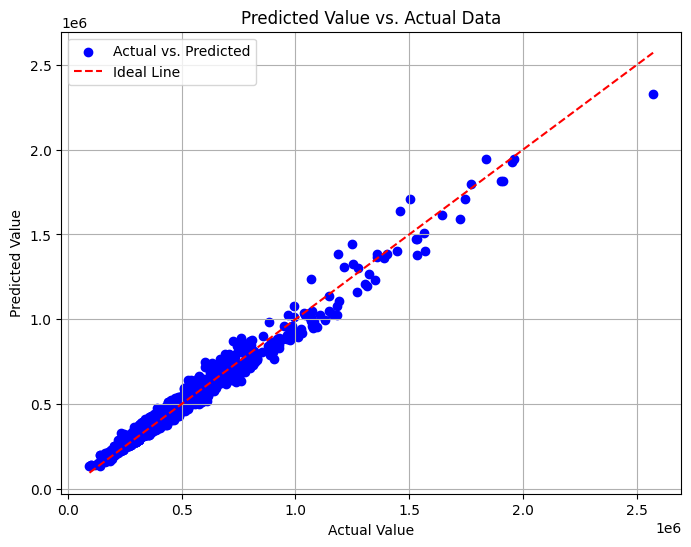

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Predicted Value vs. Actual Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.show()

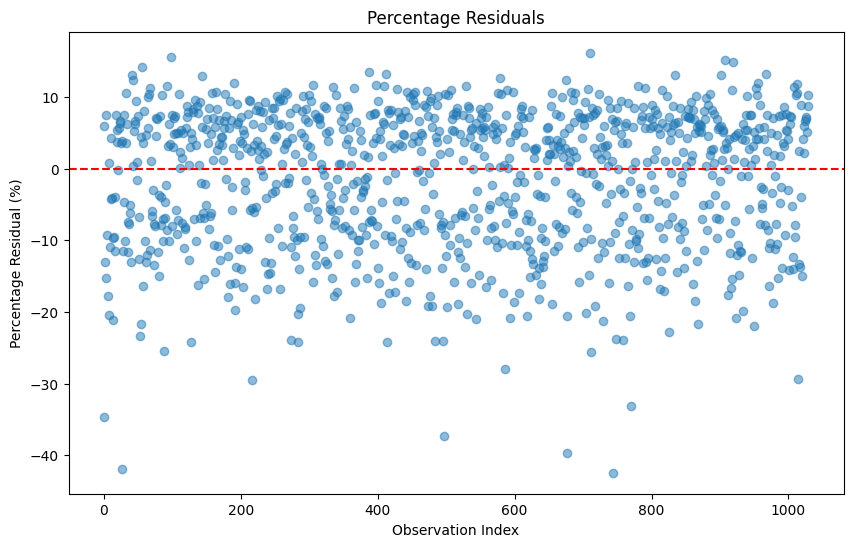

In [24]:
# Calculate percentage residuals: (Actual - Predicted) / Actual * 100
percentage_residuals = ((y_test - y_pred) / y_test) * 100

# Plotting percentage residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(percentage_residuals)), percentage_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Percentage Residuals')
plt.xlabel('Observation Index')
plt.ylabel('Percentage Residual (%)')
plt.show()